In [1]:
# prepare
import numpy as np
input_data= np.array([3, 5])

weights = {
  'node_0': np.array([2, 4]),
  'node_1': np.array([4, -5]),
  'output': np.array([2, 7])
}

In [2]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


In [3]:
type(weights['node_0'])

numpy.ndarray

In [4]:
[1,2,3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [33]:
import numpy as np
ar = np.array([1,2,3])
ar * 3

array([3, 6, 9])

In [34]:
def relu(input):
    '''rectified linear activation function: This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)

    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

In [35]:
# Print model output
print(model_output)

52


In [36]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[36, 60]


In [22]:
# prepare
import numpy as np

weights= {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

In [23]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = relu((hidden_1_outputs * weights['output']).sum())
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


In [37]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]),
             'output': np.array([1, 1])
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 0]),
             'output': np.array([1, 1])
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


In [41]:
# prepare
import numpy as np

input_data= [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

target_actuals= [1, 3, 5, 7]

weights_0= {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}

weights_1= {'node_0': np.array([2, 1]),
            'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}

In [42]:
print(type(target_actuals))

<class 'list'>


In [43]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 14.500000


In [45]:
# loss function
# 数理最適化および決定理論では、損失関数またはコスト関数は、イベントまたは1つ以上の変数の値を、
# イベントに関連付けられた「コスト」を直感的に表す実数にマップする関数です。最適化問題は、損失関数を最小化しようとします。

import numpy as np

weights= np.array([0, 2, 1])
input_data= np.array([1, 2, 3])
target= 0

In [46]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [2]:
# prepare
import numpy as np
import matplotlib.pyplot as mt

input_data= np.array([1, 2, 3])
target= 0
weights= np.array([0, 2, 1])

def get_slope(input_data, target, weights):

    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the slope: slope
    return(2 * input_data * error)

def get_mse(input_data, target, weights):

    # Get updated predictions: preds_updated
    preds_updated = (weights * input_data).sum()

    # Calculate updated error: error_updated
    error_updated = preds_updated - target

    # Calculate the slope: slope
    return(error_updated)


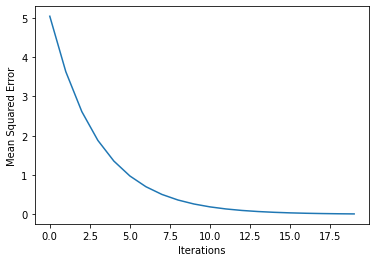

In [3]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse (mean squared error)
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
mt.plot(mse_hist)
mt.xlabel('Iterations')
mt.ylabel('Mean Squared Error')
mt.show()

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


In [1]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='2.7.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
cha